In [31]:
%config Completer.use_jedi = False

# Cross validation section

In [108]:
import numpy as np
import pandas  as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [109]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,LogisticRegression
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score,SCORERS
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [4]:
df = pd.read_csv('Jose lesson/DATA/Advertising.csv')
df_cpy = df.copy()

In [5]:
X = df_cpy.drop(['sales'],axis=1)
y = df_cpy['sales']

### classic train test split

In [6]:
# data is already clean
# data ready to train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#scaling only train x
scaler = StandardScaler()
scaler.fit(X_train)
scld_X_train = scaler.transform(X_train)
scld_X_test = scaler.transform(X_test)

In [7]:
ridge_MAE = []
ridge_RMSE = []
for i in np.linspace(0,10,1000):
    ridge_model = Ridge(alpha=i)
    ridge_model.fit(scld_X_train,y_train)
    rg_predict = ridge_model.predict(scld_X_test)
    
    # evaluating model
    MAE_result = MAE(y_test,rg_predict)
    ridge_MAE.append(MAE_result)
    
    RMSE_result = np.sqrt(MSE(y_test,rg_predict))
    ridge_RMSE.append(RMSE_result)

In [8]:
ridge_RMSE.index(min(ridge_RMSE))
ridge_RMSE[0]
#1.5161519375993884
min(ridge_RMSE)
#1.5161519375993884

1.5161519375993884

conclussion from doing classic train test split :
1. when you input an aplha(lambda) in hyperparameter at the first time you'll get an error metrics
2. you adjust your hyperparam based on error metrics.
3. unfortunately this is cheating and not a fair evaluation. why?  
when we readjust our hyperparam, we do it by looking at the test performance. yes technically the machince never see the test data. but we do !. this is not fair and seems there is a hidden interaction behind the model and in the data.  
so what do we do to get fair result?
4. we will do TRAIN | Validation | test  
this will give to us the model true performance on completely unseen by model and us. hence will give fair result to report

### Train validation test

In [9]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

#train 70%, validation 15%, test 15% 

In [10]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_train) #avoid data leaking, fit only train data
scld_X_train  = scaler.transform(X_train)
scld_X_eval = scaler.transform(X_eval)
scld_X_test = scaler.transform(X_test)
#scale all of the data

In [11]:
model = Ridge(alpha=0)
model.fit(scld_X_train,y_train)
prediction = model.predict(scld_X_eval)

In [12]:
mse_result = MSE(y_eval,prediction)
mae_result = MAE(y_eval,prediction)
print('this is mse result : {}'.format(mse_result))
print('this is mae result : {}'.format(mae_result))

this is mse result : 2.3564786656264913
this is mae result : 1.1895809792008667


In [13]:
# no adjust param after this
final_pred = model.predict(scld_X_test)
final_mae = MAE(y_test,final_pred)
final_mse = MSE(y_test,final_pred)

### below is your final score to report the performance

In [14]:
print(final_mae)

1.2379105680280957


In [15]:
print(final_mse)

2.240954730146269


## Cross validation with cross_val_score

In [83]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
scld_Xtrain = scaler.transform(X_train)
scld_Xtest = scaler.transform(X_test)

In [62]:
len(scld_X_train)

140

In [63]:
len(y_train)

140

In [64]:
#choose model
model = Ridge(alpha= 0.1)

In [65]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [66]:
scores = cross_val_score(model, scld_Xtrain, y_train,scoring='neg_root_mean_squared_error',cv=10)
scores

array([-1.72496136, -1.73880912, -1.48908565, -0.91853104, -1.85292722,
       -2.86628974, -1.39377297, -1.66174677, -2.22825248, -1.68602375])

In [67]:
abs(scores).mean()

1.7560400113812757

In [39]:
# readjust lambda until satisfied with the model performance
# if we already satisfied then proceed to the next step

In [68]:
# fit to the model
model.fit(scld_Xtrain,y_train)

Ridge(alpha=0.1)

In [69]:
final_predict = model.predict(scld_Xtest)
#final_predict
# final report 
RMSE = np.sqrt(MSE(y_test,final_predict))
RMSE
# prohibited to re adjust parameters

1.516790262480717

### Cross validation with cross_validate

In [90]:
model2 = Lasso(alpha=12)

In [91]:
scores = cross_validate(model2,scld_Xtrain,y_train,
                        scoring=['neg_mean_absolute_error','r2','neg_root_mean_squared_error'],
                       cv=10)

In [92]:
model_df = pd.DataFrame(scores)
model_df.mean()

fit_time                            0.002400
score_time                          0.002800
test_neg_mean_absolute_error       -4.222120
test_r2                            -0.123858
test_neg_root_mean_squared_error   -5.141198
dtype: float64

In [97]:
model2 = Lasso(alpha=0.5)
scores = cross_validate(model2,scld_Xtrain,y_train,
                        scoring=['neg_mean_absolute_error','r2','neg_root_mean_squared_error'],
                       cv=10)

In [98]:
model_df = pd.DataFrame(scores)
model_df.mean()

fit_time                            0.002000
score_time                          0.002100
test_neg_mean_absolute_error       -1.382854
test_r2                             0.839045
test_neg_root_mean_squared_error   -1.864656
dtype: float64

In [99]:
model2.fit(scld_Xtrain,y_train)
final_prediction = model.predict(scld_Xtest)

In [100]:
final_mae = MAE(y_test,final_prediction)
final_rmse = np.sqrt(MSE(y_test,final_prediction))

In [101]:
final_mae

1.2140617628439185

In [102]:
final_rmse

1.516790262480717

In [24]:
print(list(range(1,11)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Grid Search Section

In [27]:
RMSE_train_result = []
RMSE_test_result = []

In [28]:
for i in range(1,11):    
    ply = PolynomialFeatures(degree=i,include_bias=False)
    ply_feature = ply.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(ply_feature, y, test_size=0.30, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    
    RMSE_train = np.sqrt(MSE(y_train,predict_train))
    RMSE_test = np.sqrt(MSE(y_test,predict_test))
    RMSE_test_result.append(RMSE_test)
    RMSE_train_result.append(RMSE_train)
    


In [29]:
len(RMSE_test_result)

10

In [30]:
RMSE_train_result

[1.5745968305905442,
 0.5950712355838923,
 0.46887581118220883,
 0.36946897017714747,
 0.24382206223696282,
 0.18673496127424957,
 0.11563961025289035,
 5.2914781871754844e-11,
 2.6591048050352858e-11,
 1.4983656486954024e-11]

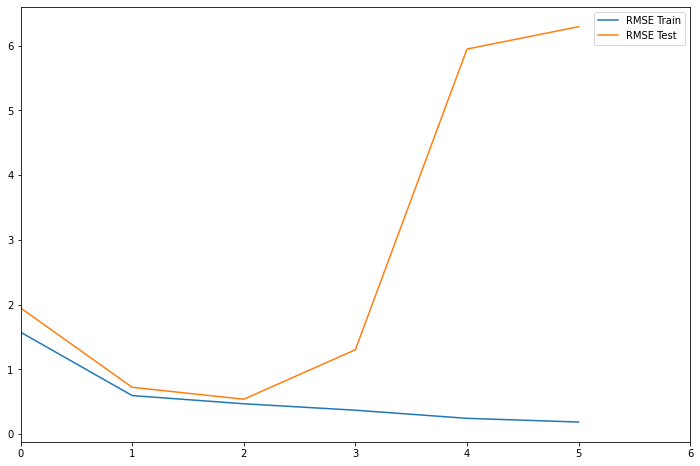

In [35]:
plt.figure(figsize=(12,8))
plt.plot(range(6),RMSE_train_result[:6], label='RMSE Train')
plt.plot(range(6),RMSE_test_result[:6], label='RMSE Test')
plt.xlim(0,6)
plt.legend()
plt.show()

In [43]:
#convert into polynomial features
ply = PolynomialFeatures(degree=1, include_bias=False)
ply_feature = ply.fit_transform(X)

#train test split #hold out test 15%
X_train, X_test, y_train, y_test = train_test_split(ply_feature, y, test_size=0.15, random_state=42)

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

#grid search for elastic
model = ElasticNet()
params = {'l1_ratio':[.1,.25,.3,.5,7,.8,.95,1],'alpha':[0.1,0.25,.3,.5,1,3,5,7,10,15,30,50],'max_iter':[100000]}
grid_search = GridSearchCV(estimator=model,param_grid=params, cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.40716352941176476
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.39287264052287585
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.4054370588235294
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not conv

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.25, 0.3, 0.5, 1, 3, 5, 7, 10, 15, 30,
                                   50],
                         'l1_ratio': [0.1, 0.25, 0.3, 0.5, 7, 0.8, 0.95, 1],
                         'max_iter': [100000]},
             scoring='neg_root_mean_squared_error')

In [47]:
best_predict = grid_search.predict(X_test)

-1.6759530410043435

In [49]:
#final score prohibited to readjust params
RMSE_result = np.sqrt(MSE(y_test,best_predict))
RMSE_result

1.720586306597049

In [50]:
#train test split with hold out test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

#grid search for elastic
model = ElasticNet()
params = {'l1_ratio':[.1,.25,.3,.5,7,.8,.95,1],'alpha':[0.1,0.25,.3,.5,1,3,5,7,10,15,30,50],'max_iter':[100000]}
grid_search = GridSearchCV(estimator=model,param_grid=params, cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.40716352941176476
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.39287264052287585
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.4054370588235294
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not conv

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.25, 0.3, 0.5, 1, 3, 5, 7, 10, 15, 30,
                                   50],
                         'l1_ratio': [0.1, 0.25, 0.3, 0.5, 7, 0.8, 0.95, 1],
                         'max_iter': [100000]},
             scoring='neg_root_mean_squared_error')

In [52]:
best_score2 = grid_search.predict(X_test)
RMSE = np.sqrt(MSE(y_test,best_score2))
RMSE

1.7205863065970486

In [19]:
pwd

'C:\\Users\\ACER\\Data science path'

In [4]:
df = pd.read_csv('..\\Data science path\\Jose lesson\\DATA\\hearing_test.csv')

# EDA

In [33]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [34]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [36]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

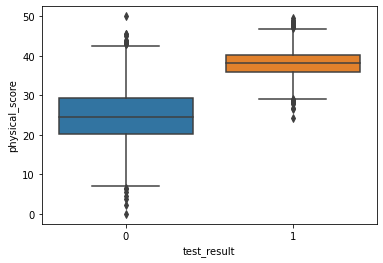

In [39]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

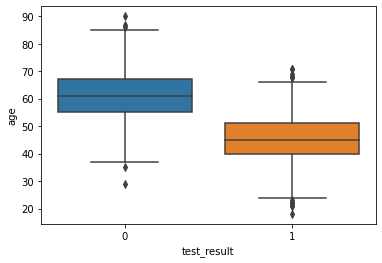

In [40]:
sns.boxplot(x='test_result', y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='count'>

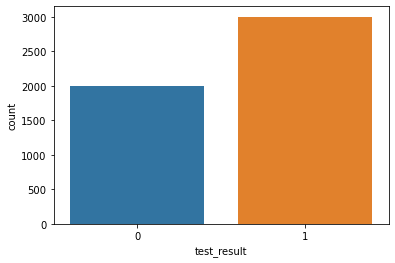

In [43]:
sns.countplot(x='test_result',data=df)

<AxesSubplot:xlabel='physical_score', ylabel='age'>

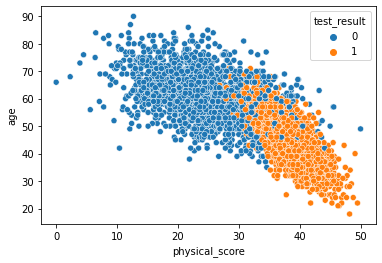

In [47]:
sns.scatterplot(x='physical_score',y='age',hue='test_result',data=df)

<AxesSubplot:>

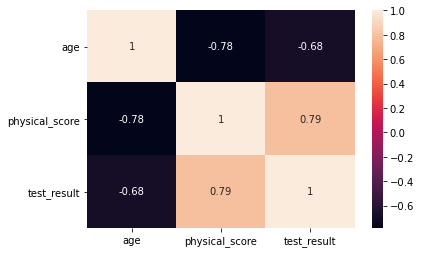

In [50]:
sns.heatmap(df.corr(),annot=True)

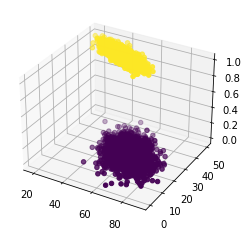

In [51]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

## Modelling

In [5]:
X = df.drop('test_result',axis=1)
y= df['test_result']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train)

log_predict = model.predict(X_test)


### Logistic evaluation metrics

In [9]:
model.coef_

array([[-0.91841476,  3.52854047]])

In [5]:
# import all required evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,roc_auc_score,roc_curve,precision_recall_curve,precision_score

In [6]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

In [13]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



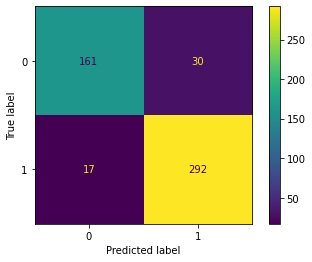

In [15]:
plot_confusion_matrix(model,X_test,y_test)

In [14]:
confusion_matrix(y_test,log_predict)

array([[161,  30],
       [ 17, 292]], dtype=int64)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test,log_predict).ravel()
print('tn: ',tn)
print('fp: ',fp)
print('fn: ',fn)
print('tp: ',tp)

tn:  161
fp:  30
fn:  17
tp:  292


In [18]:
precision_score(y_test,log_predict)

0.906832298136646

In [19]:
recall_score(y_test,log_predict)

0.9449838187702265

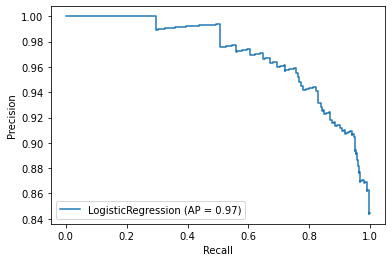

In [23]:
# roc curve and recall precision plot
plot_precision_recall_curve(model,X_test,y_test)

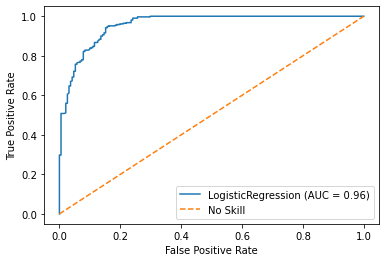

In [26]:
plot_roc_curve(model, X_test,y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.legend()

## more further reading about interpreting ROC-AUC and PR-AUC

https://www.datascienceblog.net/post/machine-learning/interpreting-roc-curves-auc/

## multiclass classification

In [110]:
df2 = pd.read_csv('Jose lesson\\DATA\\iris.csv')

### EDA

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


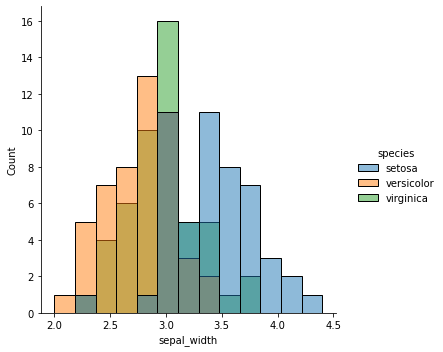

In [72]:
#gain intuition as much as possible from features and label
sns.displot(x='sepal_width',data=df2,hue='species')

<AxesSubplot:>

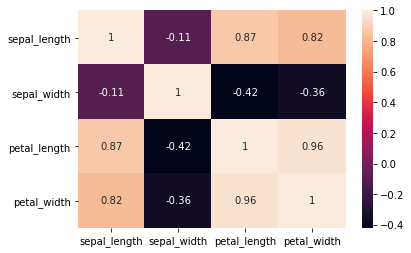

In [76]:
sns.heatmap(df2.corr(),annot=True)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

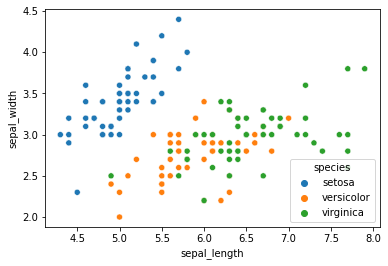

In [56]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species', data=df2)

In [91]:
df2.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

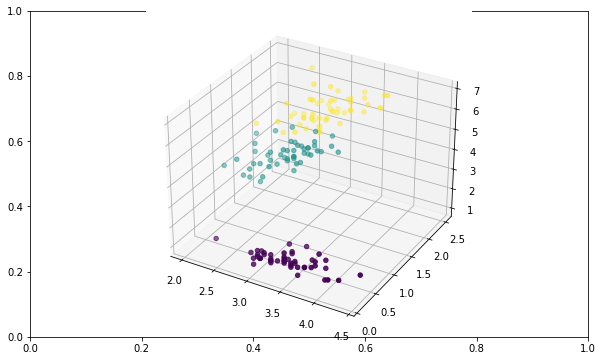

In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig,ax = plt.subplots(figsize=(10,6))
ax= fig.add_subplot(projection='3d')
colors = df2['species'].map({'setosa':0,'versicolor':1,'virginica':2})
ax.scatter(df2['sepal_width'],df2['petal_width'],df2['petal_length'],c=colors)

### Implementing machine learning

In [125]:
# separate features and label
# scikit learn is smart enough to recognize string categorical label
X= df2.drop('species',axis=1)
y=df2['species']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#choosing model 
model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=10000)
#model.fit(X_train,y_train)

In [117]:
# prediction of log probability
species_prediction = model.predict_log_proba(X_test)
species_prediction[:5]

array([[ -0.11137855,  -2.25020668, -10.70092748],
       [ -6.06010924,  -0.50855801,  -0.92557434],
       [ -3.77097123,  -1.63741248,  -0.24527708],
       [ -2.10119442,  -1.40669947,  -0.45769674],
       [ -7.40834328,  -1.28403668,  -0.32507023]])

In [118]:
#prediction of probability belonging to a class
species_prediction = model.predict_proba(X_test)
species_prediction[:5]

array([[8.94600033e-01, 1.05377443e-01, 2.25240376e-05],
       [2.33414588e-03, 6.01362113e-01, 3.96303741e-01],
       [2.30296853e-02, 1.94482620e-01, 7.82487695e-01],
       [1.22310251e-01, 2.44950417e-01, 6.32739332e-01],
       [6.06174123e-04, 2.76917216e-01, 7.22476610e-01]])

In [119]:
# clean and better prediction form
species_prediction = model.predict(X_test)
species_prediction

array(['setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

In [ ]:
#tuning hyperparam
pen = ['l1', 'l2', 'elasticnet', 'none']
l1_rat = np.linspace(0,1,20)
c = np.logspace(0,10,30)
param_grid = {'C':c,'penalty':pen,'l1_ratio':l1_rat}
search = GridSearchCV(estimator=model,cv=10,param_grid=param_grid)
search.fit(X_train,y_train)

D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
D:\anaconda\envs\Kevin x DS\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
D:\anaconda\envs\Kev

In [128]:
search.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'none'}

In [137]:
# import all required evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,roc_auc_score,roc_curve,precision_recall_curve,precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix,auc,roc_curve

In [131]:
y_pred = search.predict(X_test)

0.9130434782608695

In [132]:
accuracy_score(y_test,y_pred)

0.9130434782608695

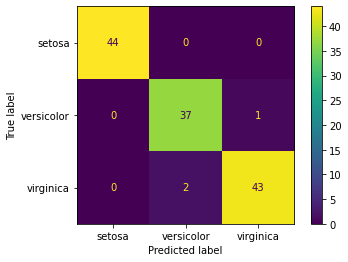

In [133]:
plot_confusion_matrix(search,X_train,y_train)

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.92      0.92      0.92        12
   virginica       0.80      0.80      0.80         5

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [135]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

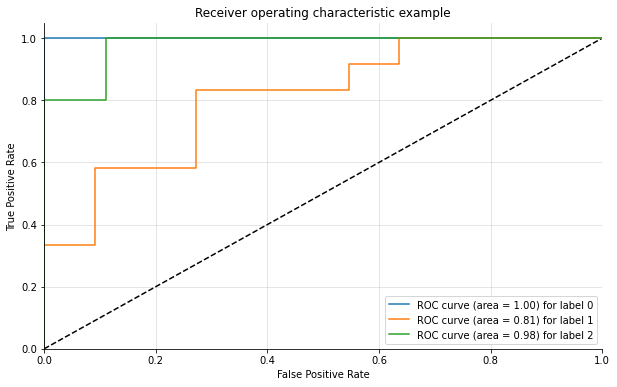

In [138]:
plot_multiclass_roc(search,X_test,y_test,n_classes=3,figsize=(10,6))